In [81]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load raw dataset

In [7]:
# the most interesting part happens here because it is f*cking deep learning where data preparation is the most important part

In [101]:
FOLDER_RAW = "dataset_raw"
FOLDER_RAW_TEST = "dataset_raw/test"
FOLDER_TEST = "dataset/test"
FOLDER = "dataset"

In [71]:
CLASSES = ['still', 'fist', 'grasp', 'two', 'fuck']

x = np.zeros(shape=(1, 128, 8))
y = np.zeros(shape=(1,))
for i, klass in enumerate(CLASSES):
    with open(f"{FOLDER_RAW}/{klass}.txt") as f:
        rows = f.read().split("\n")
        rows = [list(map(int, row.split()))[1:9] for row in rows]
        for _ in range(250):
            start = np.random.randint(0, len(rows) - 129)
            class_sample = np.array([rows[start:start + 128]])
            x = np.append(x, class_sample, axis=0)
            y = np.append(y, np.array([i]), axis=0)

x = x[1:, :, :]
y = y[1:]

In [72]:
np.save(f"{FOLDER}/x.npy", x)
np.save(f"{FOLDER}/y.npy", y)

## Load cleaned dataset

In [95]:
x = np.load(f"{FOLDER}/x.npy") / 4096
y = np.load(f"{FOLDER}/y.npy")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [96]:
x_train.shape

(1062, 128, 8)

## Creating the model

In [97]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(128, 8))) # todo: input shape
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax')) # todo: number of classes
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [99]:
model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 [==============================] - 0s 19ms/step - loss: 0.9113 - accuracy: 0.6431
Epoch 2/100
17/17 [==============================] - 0s 16ms/step - loss: 0.9076 - accuracy: 0.6808
Epoch 3/100
17/17 [==============================] - 0s 18ms/step - loss: 0.8121 - accuracy: 0.7147
Epoch 4/100
17/17 [==============================] - 0s 20ms/step - loss: 0.7822 - accuracy: 0.7119
Epoch 5/100
17/17 [==============================] - 0s 19ms/step - loss: 0.7433 - accuracy: 0.7269
Epoch 6/100
17/17 [==============================] - 0s 18ms/step - loss: 0.7063 - accuracy: 0.7608
Epoch 7/100
17/17 [==============================] - 0s 19ms/step - loss: 0.6801 - accuracy: 0.7684
Epoch 8/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6711 - accuracy: 0.7486
Epoch 9/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6716 - accuracy: 0.7514
Epoch 10/100
17/17 [==============================] - 0s 19ms/step - loss: 0.6407 - accuracy: 0.7712

In [100]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8936


[0.3470786213874817, 0.8936170339584351]

0.000732421875


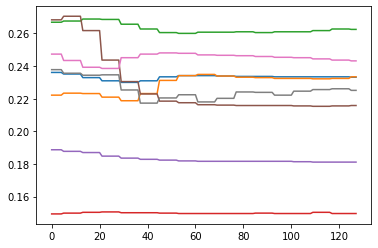

In [94]:
n = 4
plt.plot(np.arange(128), x_train[n, :, :])
print(y_train[n])

In [110]:
CLASSES = ['still', 'fist', 'grasp', 'two', 'fuck']

x = np.zeros(shape=(1, 128, 8))
y = np.zeros(shape=(1,))
for i, klass in enumerate(CLASSES):
    if klass == 'grasp':
        continue
    with open(f"{FOLDER_RAW_TEST}/{klass}.txt") as f:
        rows = f.read().split("\n")
        rows = [list(map(int, row.split()))[1:9] for row in rows]
        for _ in range(250):
            start = np.random.randint(0, len(rows) - 129)
            class_sample = np.array([rows[start:start + 128]])
            x = np.append(x, class_sample, axis=0)
            y = np.append(y, np.array([i]), axis=0)

x = x[1:, :, :]
y = y[1:]

In [104]:
np.save(f"{FOLDER_TEST}/x.npy", x)
np.save(f"{FOLDER_TEST}/y.npy", y)

In [112]:
model.evaluate(x / 4096, y)

32/32 [==============================] - 0s 3ms/step - loss: 26.5438 - accuracy: 0.2140


[26.543813705444336, 0.21400000154972076]